# Project Overview

>In this groundbreaking project, we aim to harness the power of machine learning to revolutionize the way British Airways customers make decisions about holiday packages. By leveraging advanced algorithms and predictive modeling, our goal is to provide customers with invaluable insights into the likelihood of choosing a holiday pack with British Airways. Through the seamless integration of machine learning capabilities, we aspire to analyze historical data, customer preferences, and various influencing factors to craft a personalized and informed recommendation system. This innovative approach not only enhances the decision-making process for our customers but also underscores British Airways' commitment to leveraging cutting-edge technology for an unparalleled travel experience. Join us on this journey where machine learning becomes a guiding force in helping customers make choices that align perfectly with their travel aspirations. In this project I will perform below tasks.

1. Load customer bokking data csv.
2. Prepare a dataset.
3. Feature Selection.
4. Train a machine learning model and present your findings.

# Load Data

In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder


In [15]:
df = pd.read_csv('/content/drive/MyDrive/DataSet/customer_booking.csv', encoding='ISO-8859-1')

In [16]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


# Data Processing

In [17]:
df1 = df[df['booking_origin'] != '(not set)']


In [18]:
mean_target_route = df1.groupby('route')['booking_complete'].mean().to_dict()
df1['route'] = df1['route'].map(mean_target_route)

mean_target_origin = df1.groupby('booking_origin')['booking_complete'].mean().to_dict()
df1['booking_origin'] = df1['booking_origin'].map(mean_target_origin)

<ipython-input-18-f59030b87147>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['route'] = df1['route'].map(mean_target_route)
<ipython-input-18-f59030b87147>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['booking_origin'] = df1['booking_origin'].map(mean_target_origin)


In [7]:
# df1 = pd.get_dummies(df1, columns=['flight_day'])


In [19]:
df1

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,0.000000,0.050279,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,0.000000,0.050279,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,0.000000,0.103150,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,0.000000,0.050279,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,0.000000,0.103150,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,0.058824,0.050358,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,0.058824,0.050358,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,0.058824,0.050358,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,0.058824,0.050358,1,0,1,5.62,0


In [11]:
# df1 = df1.drop(['num_passengers','sales_channel','trip_type'],axis=1)

In [20]:
df1['flight_duration_hour'] = df1.flight_duration * df1.flight_hour

<ipython-input-20-21103c131534>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['flight_duration_hour'] = df1.flight_duration * df1.flight_hour


In [ ]:
# label_encoder = LabelEncoder()
# df['flight_day'] = label_encoder.fit_transform(df['flight_day'])


In [21]:
df1

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_duration_hour
0,2,Internet,RoundTrip,262,19,7,Sat,0.000000,0.050279,1,0,0,5.52,0,38.64
1,1,Internet,RoundTrip,112,20,3,Sat,0.000000,0.050279,0,0,0,5.52,0,16.56
2,2,Internet,RoundTrip,243,22,17,Wed,0.000000,0.103150,1,1,0,5.52,0,93.84
3,1,Internet,RoundTrip,96,31,4,Sat,0.000000,0.050279,0,0,1,5.52,0,22.08
4,2,Internet,RoundTrip,68,22,15,Wed,0.000000,0.103150,1,0,1,5.52,0,82.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,0.058824,0.050358,1,0,1,5.62,0,50.58
49996,1,Internet,RoundTrip,111,6,4,Sun,0.058824,0.050358,0,0,0,5.62,0,22.48
49997,1,Internet,RoundTrip,24,6,22,Sat,0.058824,0.050358,0,0,1,5.62,0,123.64
49998,1,Internet,RoundTrip,15,6,11,Mon,0.058824,0.050358,1,0,1,5.62,0,61.82


In [22]:
df1['flight_day'] = pd.factorize(df1['flight_day'], sort=False)[0]

<ipython-input-22-94273de88add>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['flight_day'] = pd.factorize(df1['flight_day'], sort=False)[0]


In [23]:
df1['trip_type'] = pd.factorize(df1['trip_type'], sort=False)[0]

<ipython-input-23-eb99f8068ebb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['trip_type'] = pd.factorize(df1['trip_type'], sort=False)[0]


In [24]:
df1['sales_channel'] = pd.factorize(df1['sales_channel'], sort=False)[0]

<ipython-input-24-20096caedfe1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sales_channel'] = pd.factorize(df1['sales_channel'], sort=False)[0]


In [25]:
df1['route'] = pd.factorize(df1['route'], sort=False)[0]

<ipython-input-25-574ebee3d16e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['route'] = pd.factorize(df1['route'], sort=False)[0]


In [26]:
df1


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_duration_hour
0,2,0,0,262,19,7,0,0,0.050279,1,0,0,5.52,0,38.64
1,1,0,0,112,20,3,0,0,0.050279,0,0,0,5.52,0,16.56
2,2,0,0,243,22,17,1,0,0.103150,1,1,0,5.52,0,93.84
3,1,0,0,96,31,4,0,0,0.050279,0,0,1,5.52,0,22.08
4,2,0,0,68,22,15,1,0,0.103150,1,0,1,5.52,0,82.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,0,27,6,9,0,86,0.050358,1,0,1,5.62,0,50.58
49996,1,0,0,111,6,4,4,86,0.050358,0,0,0,5.62,0,22.48
49997,1,0,0,24,6,22,0,86,0.050358,0,0,1,5.62,0,123.64
49998,1,0,0,15,6,11,3,86,0.050358,1,0,1,5.62,0,61.82


In [27]:
df1['booking_origin'] = pd.factorize(df1['booking_origin'], sort=False)[0]

<ipython-input-27-bd2f1b7fb6ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['booking_origin'] = pd.factorize(df1['booking_origin'], sort=False)[0]


In [28]:
new_df = df1.copy()

# Feature Engineering

In [29]:
new_df = new_df[['length_of_stay', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration','flight_day','booking_complete']]

In [31]:
# new_df = new_df.drop(['num_passengers','trip_type',' sm kiii',], axis=1)


In [32]:
new_df['stay_baggage'] = new_df['length_of_stay']*new_df['wants_extra_baggage']

In [33]:
new_df['seat_meal'] = new_df['wants_in_flight_meals']*new_df['wants_preferred_seat']

In [34]:
df1

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_duration_hour
0,2,0,0,262,19,7,0,0,0,1,0,0,5.52,0,38.64
1,1,0,0,112,20,3,0,0,0,0,0,0,5.52,0,16.56
2,2,0,0,243,22,17,1,0,1,1,1,0,5.52,0,93.84
3,1,0,0,96,31,4,0,0,0,0,0,1,5.52,0,22.08
4,2,0,0,68,22,15,1,0,1,1,0,1,5.52,0,82.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,0,27,6,9,0,86,29,1,0,1,5.62,0,50.58
49996,1,0,0,111,6,4,4,86,29,0,0,0,5.62,0,22.48
49997,1,0,0,24,6,22,0,86,29,0,0,1,5.62,0,123.64
49998,1,0,0,15,6,11,3,86,29,1,0,1,5.62,0,61.82


In [35]:
# Calculate Pearson correlation coefficients
correlation = new_df.corr()
correlation_with_target = correlation['booking_complete'].sort_values(ascending=False)

In [36]:
correlation_with_target

booking_complete         1.000000
wants_extra_baggage      0.068062
wants_preferred_seat     0.050477
seat_meal                0.045966
wants_in_flight_meals    0.026943
flight_day              -0.010485
stay_baggage            -0.021632
length_of_stay          -0.042363
flight_duration         -0.106245
booking_origin          -0.160905
Name: booking_complete, dtype: float64

How features are related with target variable

                       length_of_stay  booking_origin  wants_extra_baggage  \
length_of_stay               1.000000        0.115203             0.176659   
booking_origin               0.115203        1.000000             0.054938   
wants_extra_baggage          0.176659        0.054938             1.000000   
wants_preferred_seat         0.032127        0.051079             0.207418   
wants_in_flight_meals        0.098837        0.090630             0.216710   
flight_duration              0.141231        0.180789             0.056578   
flight_day                   0.000886       -0.003889            -0.003553   
booking_complete            -0.042363       -0.160905             0.068062   
stay_baggage                 0.882374        0.101334             0.393529   
seat_meal                    0.071640        0.064751             0.228806   

                       wants_preferred_seat  wants_in_flight_meals  \
length_of_stay                     0.032127               0.098837   
b

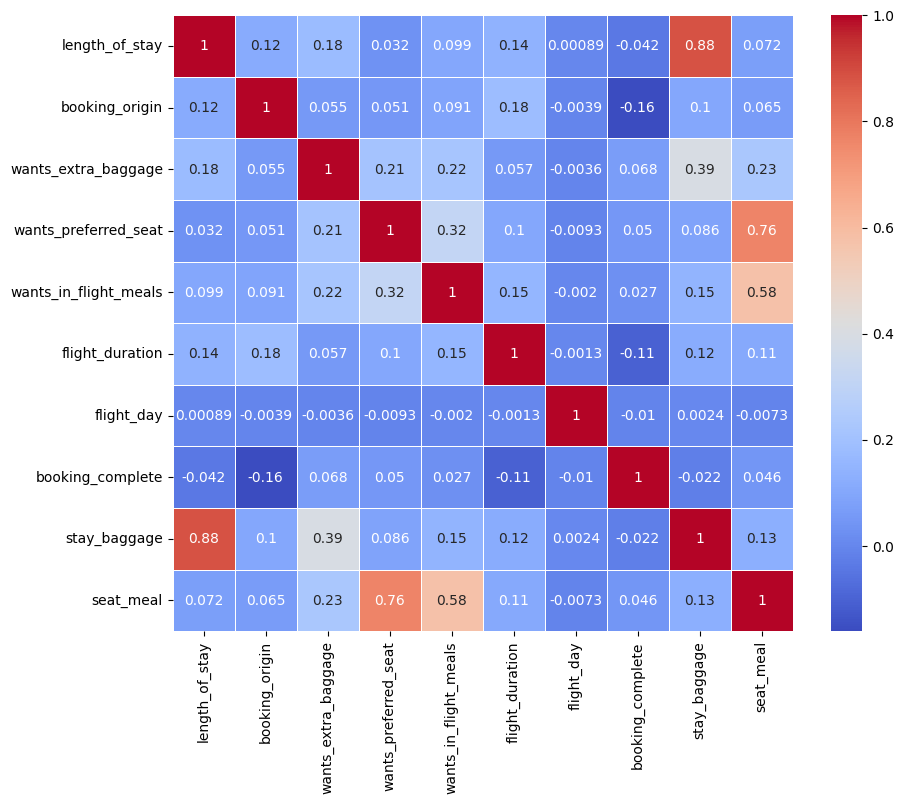

In [37]:
correlation_matrix = new_df.corr()

# You can print the correlation matrix to see the pairwise correlations
print(correlation_matrix)

# You can also create a heatmap for visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [39]:
X=df1.drop('booking_complete',axis=1)

In [40]:
y = df1['booking_complete']

In [41]:
X

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,flight_duration_hour
0,2,0,0,262,19,7,0,0,0,1,0,0,5.52,38.64
1,1,0,0,112,20,3,0,0,0,0,0,0,5.52,16.56
2,2,0,0,243,22,17,1,0,1,1,1,0,5.52,93.84
3,1,0,0,96,31,4,0,0,0,0,0,1,5.52,22.08
4,2,0,0,68,22,15,1,0,1,1,0,1,5.52,82.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,0,27,6,9,0,86,29,1,0,1,5.62,50.58
49996,1,0,0,111,6,4,4,86,29,0,0,0,5.62,22.48
49997,1,0,0,24,6,22,0,86,29,0,0,1,5.62,123.64
49998,1,0,0,15,6,11,3,86,29,1,0,1,5.62,61.82


# Feature Selection

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif

# Create a SelectKBest instance
k_best = SelectKBest(score_func=f_classif, k=7)  # Select the top 5 features

# Fit and transform your data
X_new = k_best.fit_transform(X, y)
feature_scores = k_best.scores_

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

In [43]:
f_score = feature_scores[selected_feature_indices]

In [44]:
selected_features,selected_feature_indices,X.columns

(Index(['sales_channel', 'trip_type', 'length_of_stay', 'booking_origin',
        'wants_extra_baggage', 'wants_preferred_seat', 'flight_duration'],
       dtype='object'),
 array([ 1,  2,  4,  8,  9, 10, 12]),
 Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
        'length_of_stay', 'flight_hour', 'flight_day', 'route',
        'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
        'wants_in_flight_meals', 'flight_duration', 'flight_duration_hour'],
       dtype='object'))

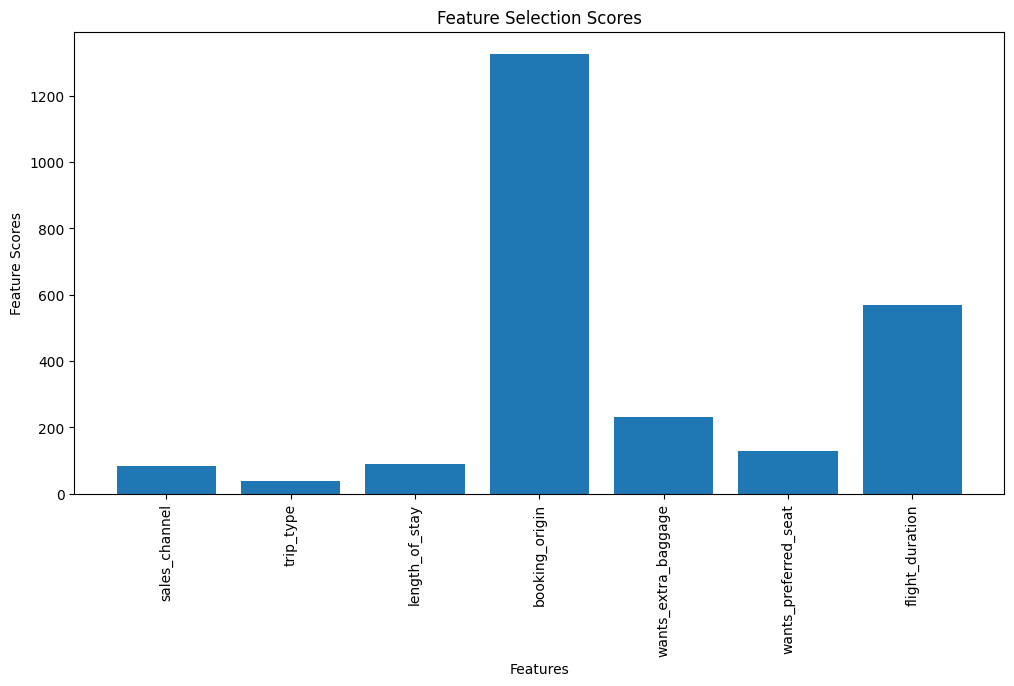

In [45]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(f_score)), f_score, tick_label=selected_features)
plt.xlabel('Features')
plt.ylabel('Feature Scores')
plt.title('Feature Selection Scores')
plt.xticks(rotation=90)
plt.show()

# Feature Selection Using Logistic Regression[link text](https://)

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create an RFE instance with a logistic regression model
estimator = LogisticRegression()
rfe = RFE(estimator, n_features_to_select=6)  # Select the top 5 features

# Fit RFE on your data
rfe.fit(X, y)

# Get the support of selected features
selected_features = X.columns[rfe.support_]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [47]:
selected_features

Index(['sales_channel', 'trip_type', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration'],
      dtype='object')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify=y)


In [49]:
X_train

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,flight_duration_hour
4659,1,0,0,168,20,16,0,73,29,0,0,0,8.83,141.28
37381,4,0,0,78,5,4,3,131,4,1,0,1,6.62,26.48
45134,1,0,0,143,6,21,6,130,5,1,0,0,7.57,158.97
11334,1,0,0,9,21,4,2,69,6,0,0,0,5.07,20.28
26972,1,0,0,10,3,7,4,98,5,0,0,0,8.67,60.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33258,1,0,0,7,4,14,3,213,6,1,1,0,8.83,123.62
47398,1,0,0,12,6,12,0,189,4,1,1,1,6.62,79.44
37850,2,1,0,286,5,4,0,138,3,1,1,0,5.33,21.32
32969,2,1,0,140,4,4,4,192,4,1,0,0,6.62,26.48


# Feature Selection Using Random Forest

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [51]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None,
     min_samples_split=5, random_state=0)
rf_classifier.fit(X_train, y_train)

# Predict using the trained model
y_pred = rf_classifier.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)


In [52]:
accuracy

0.8511618589743589

In [53]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

# Train the model on the training data
logistic_regression.fit(X_train, y_train)


LogisticRegression()

In [54]:
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8505608974358975

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
len(y_test)

4992

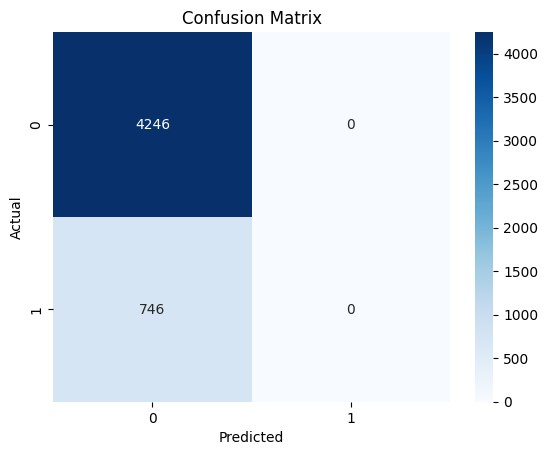

In [57]:
import seaborn as sns
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

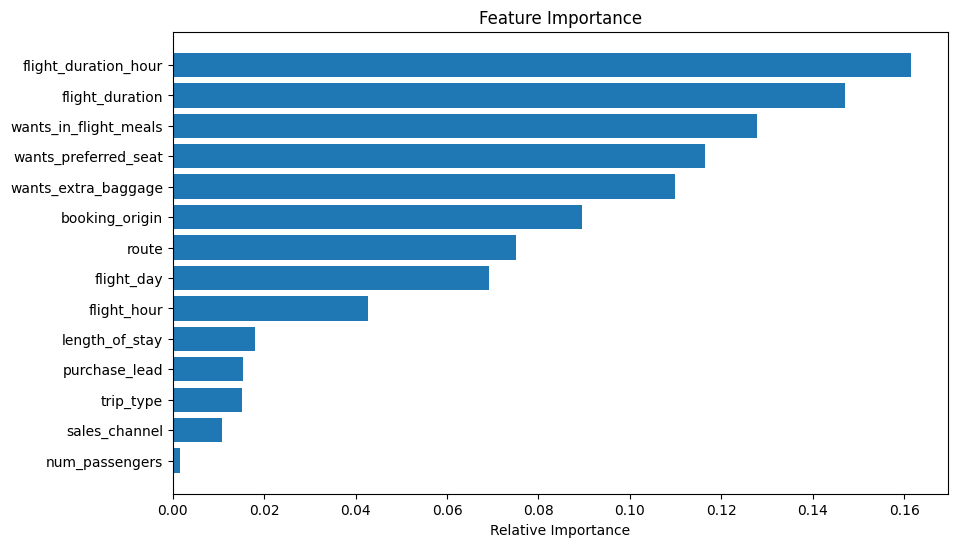

In [58]:
importance = rf_classifier.feature_importances_
features = X.columns
indices = importance.argsort()

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], align='center')

# Set the tick labels on the y-axis
plt.yticks(range(len(indices)), [features[i] for i in range(len(features))])

plt.xlabel('Relative Importance')
plt.show()


In [59]:
importance

array([0.04270115, 0.01085003, 0.00161348, 0.16146112, 0.10981346,
       0.08945812, 0.07515015, 0.14708922, 0.12781019, 0.01542034,
       0.01519783, 0.01795888, 0.06909058, 0.11638544])

In [61]:
features.argsort()


array([ 8,  6, 12, 13,  5,  4,  0,  3,  7,  1,  2,  9, 11, 10])

In [62]:
features

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'flight_duration_hour'],
      dtype='object')